In [283]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from bs4 import BeautifulSoup
df = pd.read_csv('musics.csv', index_col=0)
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [284]:
#Scaling features
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.703,0.336,-15.422,0.3340,0.09370,0.025800,0.0447,0.7120,73.911,5MKYnizdhDDik45mEncVXu,310707
1,0.830,0.467,-10.936,0.0953,0.05510,0.000016,0.0662,0.8370,140.569,2C7V873vI6fomP10lVwcfm,198440
2,0.777,0.402,-9.378,0.1560,0.00953,0.000848,0.0973,0.6340,73.412,21BiCaMzG9Lfs0Pj5ItwX0,200800
3,0.637,0.612,-7.298,0.0661,0.03140,0.000326,0.1550,0.7110,76.295,6O4FoKdYi42CFjfd0MM04n,191160
4,0.664,0.687,-6.172,0.1730,0.00659,0.000000,0.1350,0.5250,86.348,4o6ZuLYr04LqFQNiSGVK4u,258653
...,...,...,...,...,...,...,...,...,...,...,...
2619,0.687,0.910,-6.128,0.0437,0.00100,0.818000,0.1100,0.0676,133.995,6Z2NosTNVXFCTqKG3HmB04,231438
2621,0.504,0.762,-7.861,0.0360,0.00102,0.701000,0.1280,0.0317,123.968,0ThPAtLfX0NbibIrEfWFHi,255992
2622,0.646,0.888,-6.471,0.0696,0.02620,0.159000,0.3420,0.2690,122.034,3hbrsLMAEvxyOY9lgI8dmg,197661
2623,0.593,0.755,-6.608,0.0333,0.00603,0.000050,0.0897,0.2780,130.021,67stT9mRSOt6eO1bjB2AlH,229663


In [285]:
#separete numerical values for the scaling
numeric = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(exclude=[np.number])

In [286]:
#scaling the numerical values
scaler = StandardScaler()
scaler.fit(numeric)
n_scaled = scaler.transform(numeric)
n_scaled_df = pd.DataFrame(n_scaled, columns = numeric.columns)
display(numeric.head())
print()
display(n_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.703,0.336,-15.422,0.3340,0.09370,0.025800,0.0447,0.712,73.911,310707
1,0.830,0.467,-10.936,0.0953,0.05510,0.000016,0.0662,0.837,140.569,198440
2,0.777,0.402,-9.378,0.1560,0.00953,0.000848,0.0973,0.634,73.412,200800
3,0.637,0.612,-7.298,0.0661,0.03140,0.000326,0.1550,0.711,76.295,191160
4,0.664,0.687,-6.172,0.1730,0.00659,0.000000,0.1350,0.525,86.348,258653


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.379968,-0.973141,-0.999959,1.985970,-0.801252,-0.365882,-0.874864,0.786603,-1.510004,1.021444
1,1.085774,-0.430318,-0.238555,-0.099177,-0.919269,-0.451344,-0.720624,1.260860,0.806223,-0.346189
2,0.791225,-0.699657,0.025883,0.431064,-1.058597,-0.448587,-0.497514,0.490666,-1.527343,-0.317440
3,0.013171,0.170517,0.378919,-0.354251,-0.991731,-0.450318,-0.083576,0.782809,-1.427165,-0.434874
4,0.163224,0.481294,0.570033,0.579566,-1.067586,-0.451398,-0.227055,0.077114,-1.077844,0.387324


In [287]:
categorical = categorical.reset_index(drop=True)
categorical

,id
0,5MKYnizdhDDik45mEncVXu
1,2C7V873vI6fomP10lVwcfm
2,21BiCaMzG9Lfs0Pj5ItwX0
3,6O4FoKdYi42CFjfd0MM04n
4,4o6ZuLYr04LqFQNiSGVK4u
...,...
2550,6Z2NosTNVXFCTqKG3HmB04
2551,0ThPAtLfX0NbibIrEfWFHi
2552,3hbrsLMAEvxyOY9lgI8dmg
2553,67stT9mRSOt6eO1bjB2AlH


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

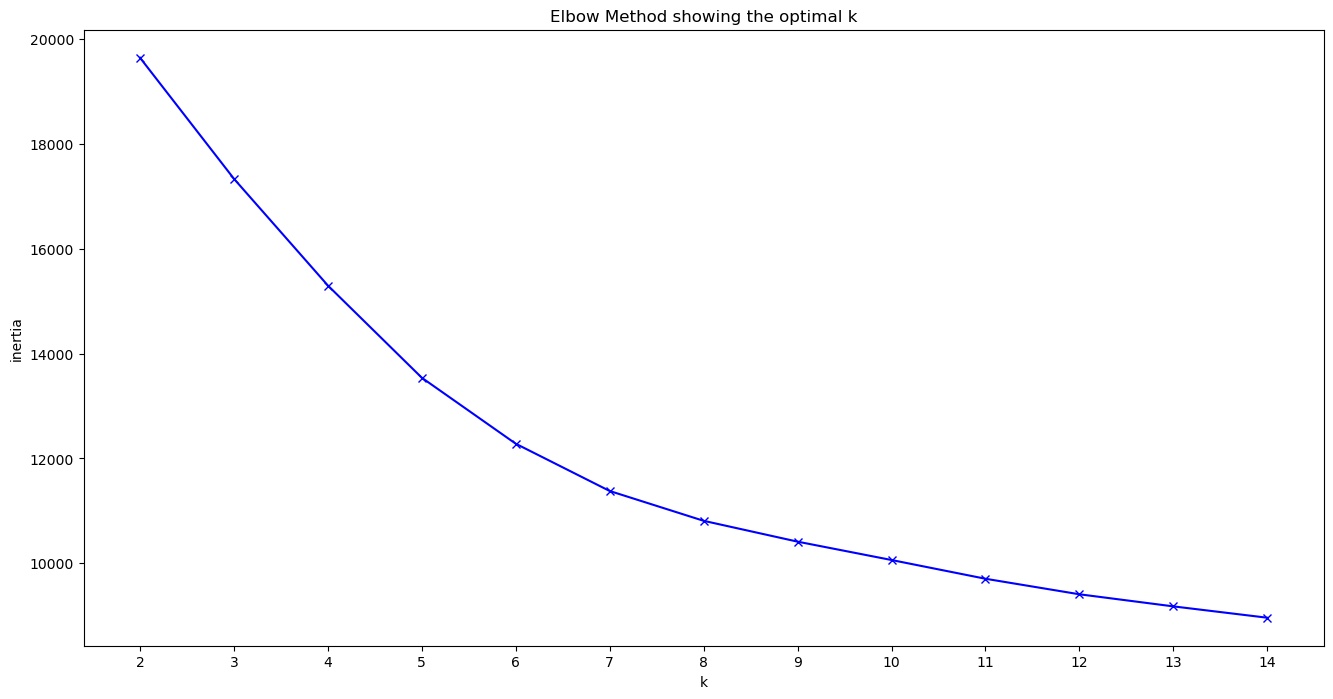

In [288]:
#Choosing the numbers of ks with elbow 
K = range(2, 15)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(n_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [289]:
#Clustering
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(n_scaled_df)

KMeans(random_state=1234)

In [290]:
#adding labels
kmeans.labels_

array([4, 5, 5, ..., 1, 1, 0])

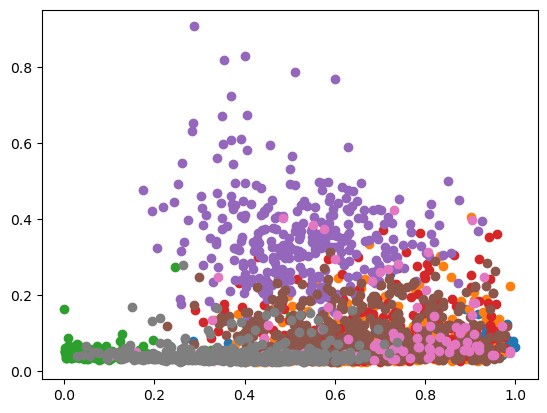

In [291]:
# assign a cluster to each example
labels = kmeans.predict(n_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df.to_numpy()[row_ix, 1], df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [292]:
clusters = kmeans.predict(n_scaled_df)
#clusters
clusters = pd.Series(clusters).sort_index()
clusters

0       4
1       5
2       5
3       5
4       1
       ..
2550    0
2551    0
2552    1
2553    1
2554    0
Length: 2555, dtype: int32

In [293]:
songs = pd.concat([n_scaled_df, categorical, clusters.rename('Clusters')], axis=1)

In [294]:
songs

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id,Clusters
0,0.379968,-0.973141,-0.999959,1.985970,-0.801252,-0.365882,-0.874864,0.786603,-1.510004,1.021444,5MKYnizdhDDik45mEncVXu,4
1,1.085774,-0.430318,-0.238555,-0.099177,-0.919269,-0.451344,-0.720624,1.260860,0.806223,-0.346189,2C7V873vI6fomP10lVwcfm,5
2,0.791225,-0.699657,0.025883,0.431064,-1.058597,-0.448587,-0.497514,0.490666,-1.527343,-0.317440,21BiCaMzG9Lfs0Pj5ItwX0,5
3,0.013171,0.170517,0.378919,-0.354251,-0.991731,-0.450318,-0.083576,0.782809,-1.427165,-0.434874,6O4FoKdYi42CFjfd0MM04n,5
4,0.163224,0.481294,0.570033,0.579566,-1.067586,-0.451398,-0.227055,0.077114,-1.077844,0.387324,4o6ZuLYr04LqFQNiSGVK4u,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2550,0.291047,1.405336,0.577501,-0.549925,-1.084677,2.259928,-0.406404,-1.658286,0.577790,0.055791,6Z2NosTNVXFCTqKG3HmB04,0
2551,-0.725980,0.792070,0.283361,-0.617188,-1.084616,1.872122,-0.277273,-1.794493,0.229373,0.354907,0ThPAtLfX0NbibIrEfWFHi,0
2552,0.063189,1.314175,0.519284,-0.323677,-1.007629,0.075620,1.257955,-0.894164,0.162170,-0.355679,3hbrsLMAEvxyOY9lgI8dmg,1
2553,-0.231360,0.763065,0.496031,-0.640773,-1.069298,-0.451234,-0.552036,-0.860017,0.439702,0.034168,67stT9mRSOt6eO1bjB2AlH,1


In [295]:
##Bringing the 100 hot in.
hot = pd.read_csv('hot.csv', index_col=0)
hot['Titles'] = hot['Titles'].str.lower()
hot

,Titles,Artists
0,flowers,Miley Cyrus
1,kill bill,SZA
2,last night,Morgan Wallen
3,unholy,Sam Smith & Kim Petras
4,creepin',"Metro Boomin, The Weeknd & 21 Savage"
...,...,...
95,yandel 150,Yandel & Feid
96,heart to heart,Mac DeMarco
97,next thing you know,Jordan Davis
98,never gonna not dance again,P!nk


In [302]:
from IPython.display import IFrame
import config
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))
import random
#write a function to recommend a song from the top 100
def pop():
    greats = list(hot['Titles'])
    title = input(f'swoisjwiojs\n')
    title = title.lower()
    if title in greats:
        y = random.choice(greats)
        result = sp.search(q=y,market="GE")
        result_id = result["tracks"]["items"][0]["id"]
        return result_id
    else:
        print('Your song is not between the 100 hottest songs. We will recommend you a similar song')

In [303]:
pop()

swoisjwiojs
flowers


'67AdiJcurlf6gocGobfaXs'

In [ ]:
def test(song):
    x = song.lower()
    return x

test('flowers')